In [24]:
import requests
import pandas as pd
import hashlib
import json
import random

In [25]:
list_of_characters = []
offset = 0

for i in range(15):
    url = f'http://gateway.marvel.com/v1/public/characters'
    private_key = "9569164e98f5f2b3a84ce161f501b6e7cda35997"
    public_key = "f4afbc73aea9aa4703bf0ba8e236f72c"
    limit = 100

    ts = "1580473503"
    h =  "80291752e65a9c7f636ebd0752a64b5f"

    p = {
      "apikey": public_key ,
      "ts": ts,
      "hash": h,
      "limit" : limit,
      "offset" : offset
    }
    offset += limit
    
    response = requests.get(url, params=p)
    result = response.json()
    
    list_of_characters.append(result)

In [26]:
column_names = []
column_ids = []
for i in range(len(list_of_characters)):
    for character in list_of_characters[i]['data']['results']:
        column_names.append(character["name"])
        column_ids.append(character["id"])
df_marvel = pd.DataFrame({'Names': column_names, 'Ids': column_ids})
df_marvel

,Names,Ids
0,3-D Man,1011334
1,A-Bomb (HAS),1017100
2,A.I.M.,1009144
3,Aaron Stack,1010699
4,Abomination (Emil Blonsky),1009146
...,...,...
1488,Zemo,1010780
1489,Zodiak,1011127
1490,Zombie (Simon Garth),1009741
1491,Zuras,1011183


In [27]:
df_marvel = pd.DataFrame(column_names, columns =['Name']) 
df_marvel

,Name
0,3-D Man
1,A-Bomb (HAS)
2,A.I.M.
3,Aaron Stack
4,Abomination (Emil Blonsky)
...,...
1488,Zemo
1489,Zodiak
1490,Zombie (Simon Garth)
1491,Zuras


In [28]:
column_ids = []
for i in range(len(list_of_characters)):
    for character in list_of_characters[i]['data']['results']:
        column_ids.append(character["id"])
        
column_ids

[1011334,
 1017100,
 1009144,
 1010699,
 1009146,
 1016823,
 1009148,
 1009149,
 1010903,
 1011266,
 1010354,
 1010846,
 1011297,
 1011031,
 1009150,
 1011198,
 1011175,
 1011136,
 1011176,
 1010870,
 1011194,
 1011170,
 1009240,
 1011120,
 1010836,
 1010755,
 1011214,
 1009497,
 1014990,
 1009435,
 1010370,
 1011324,
 1011164,
 1011227,
 1009567,
 1011382,
 1011361,
 1009151,
 1010672,
 1010673,
 1010905,
 1009152,
 1016824,
 1011396,
 1011338,
 1009153,
 1017574,
 1010674,
 1009346,
 1009154,
 1011301,
 1010802,
 1010801,
 1011208,
 1009156,
 1011253,
 1010866,
 1010773,
 1017438,
 1009158,
 1010686,
 1009159,
 1009160,
 1010784,
 1011275,
 1011012,
 1011298,
 1010827,
 1009740,
 1010748,
 1009161,
 1010718,
 1009162,
 1010835,
 1010336,
 1009163,
 1009164,
 1009165,
 1015239,
 1011766,
 1009168,
 1009596,
 1009169,
 1009170,
 1010906,
 1011137,
 1011354,
 1009550,
 1009171,
 1009172,
 1009173,
 1009174,
 1009175,
 1010909,
 1010908,
 1009176,
 1009177,
 1009178,
 1009179,
 1009329,


In [29]:
df_marvel["ID"] = column_ids
df_marvel 

,Name,ID
0,3-D Man,1011334
1,A-Bomb (HAS),1017100
2,A.I.M.,1009144
3,Aaron Stack,1010699
4,Abomination (Emil Blonsky),1009146
...,...,...
1488,Zemo,1010780
1489,Zodiak,1011127
1490,Zombie (Simon Garth),1009741
1491,Zuras,1011183


In [30]:
df_marvel.to_csv("marvel_characters.csv")

In [31]:
marvel_stats = pd.read_csv('../data/charcters_stats.csv')
marvel_stats

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436
...,...,...,...,...,...,...,...,...,...
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388
609,Zatanna,good,75,10,23,28,100,56,292


In [32]:
df_marvel

,Name,ID
0,3-D Man,1011334
1,A-Bomb (HAS),1017100
2,A.I.M.,1009144
3,Aaron Stack,1010699
4,Abomination (Emil Blonsky),1009146
...,...,...
1488,Zemo,1010780
1489,Zodiak,1011127
1490,Zombie (Simon Garth),1009741
1491,Zuras,1011183


In [33]:
# WRANGLING

cleaned_ids = df_marvel["ID"]
df_cleaned_ids = pd.DataFrame(cleaned_ids)
df_cleaned_ids

,ID
0,1011334
1,1017100
2,1009144
3,1010699
4,1009146
...,...
1488,1010780
1489,1011127
1490,1009741
1491,1011183


In [34]:
cleaned_names = df_marvel["Name"].apply(lambda x: x.split("(")[0].strip() )
# We eliminated the extension of the name to avoid having repeted characters (e.g. Wolverine, Wolverin (Ultimate), Wolwerin (Age of Dragon))
df_cleaned_names = pd.DataFrame(cleaned_names)
df_cleaned_names

,Name
0,3-D Man
1,A-Bomb
2,A.I.M.
3,Aaron Stack
4,Abomination
...,...
1488,Zemo
1489,Zodiak
1490,Zombie
1491,Zuras


In [149]:
df_cleaned_1 = df_cleaned_names.merge(df_cleaned_ids, left_index=True, right_index=True)
df_cleaned_1

#we merged both column clean name with id to create match (new dataframe)

,Name,ID
0,3-D Man,1011334
1,A-Bomb,1017100
2,A.I.M.,1009144
3,Aaron Stack,1010699
4,Abomination,1009146
...,...,...
1488,Zemo,1010780
1489,Zodiak,1011127
1490,Zombie,1009741
1491,Zuras,1011183


In [150]:
df_cleaned_2 = df_cleaned_1.drop_duplicates("Name")
df_cleaned_2 

# we eliminated duplicate value (as before, we removed the extension)

,Name,ID
0,3-D Man,1011334
1,A-Bomb,1017100
2,A.I.M.,1009144
3,Aaron Stack,1010699
4,Abomination,1009146
...,...,...
1488,Zemo,1010780
1489,Zodiak,1011127
1490,Zombie,1009741
1491,Zuras,1011183


In [151]:
Marvel_temp = df_cleaned_2.merge(marvel_stats, on = "Name")

In [152]:
Marvel_DF = Marvel_temp[Marvel_temp["Total"] > 5] 
Marvel_DF

""""We noticed that some characters add value = 1 on all attributes (tot=5). 
We treated them as typos so we deleted the characters from dataframe"""

'"We noticed that some characters add value = 1 on all attributes (tot=5). \nWe treated them as typos so we deleted the characters from dataframe'

In [153]:
list_of_columns = list(Marvel_FD.columns)
list_of_columns = list_of_columns[3:]

In [154]:
def mean_df(df):
    dict_means = {}
    for i in list_of_columns:
        dict_means[i] = df[i].mean()
    return dict_means

means_tot = mean_df(Marvel_DF)

In [155]:
def median_df(df):
    dict_medians = {}
    for i in list_of_columns:
        dict_medians[i] = df[i].median()
    return dict_medians

median_tot = median_df(Marvel_DF)

In [156]:
heroes = Marvel_DF[Marvel_DF.Alignment == 'good']
villains = Marvel_DF[Marvel_DF.Alignment == 'bad']

means_heroes = mean_df(heroes)
median_heroes = median_df(heroes)

means_villains = mean_df(villains)
median_villains = median_df(villains)

In [201]:
""" This function generate a dataframe with the no (spec.) top
heroes or villains (depending on alignment spec.) that score
the highest on the spec. attribut. """

def top_something(df, alignment, attribute, list_lenght):
    top = Marvel_DF[Marvel_DF['Alignment'] == alignment].sort_values(attribute, ascending = False).head(list_lenght) 
    return top

Top_20_Poweful_Heroes = top_something(Marvel_DF, "good", "Power", 20)

In [191]:
""" This function generate a dataframe with the no (spec.) worst
heroes or villains (depending on alignment spec.) that score
the highest on the spec. attribut. """

def bottom_something_test(df, alignment, attribute, list_lenght):
    bottom = Marvel_DF[Marvel_DF['Alignment'] == alignment].sort_values(attribute, ascending = False).head(list_lenght) 
    return bottom

Least_10_Poweful_Heroes = top_something(Marvel_DF, "good", "Power", 10)

In [159]:
# Heroes with intelligence above average / all heroes

#To DO: functom
means_heroes = mean_df(heroes)
means_heroes

smart_heroes = heroes[heroes["Intelligence"] > means_heroes["Intelligence"]] 
len(smart_heroes)

52

In [163]:
# Heroes with intelligence above average / of all characters

smarter_heroes = heroes[heroes["Intelligence"] > means_tot["Intelligence"]] 

len(smarter_heroes)

#Same number. 

52

In [197]:
Marvel_DF_noID = Marvel_DF.drop(columns = ["ID"])
Marvel_DF_noID.corr()

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Intelligence,1.000000,0.166095,0.101775,0.160875,0.331037,0.149086,0.446589
Strength,0.166095,1.000000,0.397891,0.659480,0.291588,0.160401,0.776089
Speed,0.101775,0.397891,1.000000,0.456133,0.329396,0.051929,0.617359
Durability,0.160875,0.659480,0.456133,1.000000,0.413390,0.182003,0.814367
Power,0.331037,0.291588,0.329396,0.413390,1.000000,0.066551,0.653712
Combat,0.149086,0.160401,0.051929,0.182003,0.066551,1.000000,0.386687
Total,0.446589,0.776089,0.617359,0.814367,0.653712,0.386687,1.000000


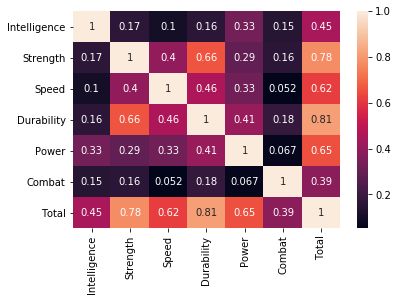

In [198]:
import seaborn as sns

sns.heatmap(Marvel_DF_noID.corr(), annot=True)